In [5]:
!mkdir data
# !curl http://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/study_rooms.zip --output study_rooms.zip # 8gb
!curl http://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/studies.zip --output ./data/studies.zip
!curl http://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/office_kitchens.zip --output ./data/office_kitchens.zip
!curl http://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/cafe.zip --output ./data/cafe.zip
!curl http://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/basements.zip --output ./data/basements.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2935M  100 2935M    0     0  59.2M      0  0:00:49  0:00:49 --:--:-- 63.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2292M  100 2292M    0     0  13.3M      0  0:02:52  0:02:52 --:--:-- 14.9M02:55  0:01:37  0:01:18 13.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1589M  100 1589M    0     0  26.4M      0  0:01:00  0:01:00 --:--:-- 27.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1732M  100 1732M    0     0  52.7M      0  0:00:32  0:00:32 --:--:-- 67.6M


In [41]:
!curl http://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/nyu_depth_v2_labeled.mat --output ./data/nyu_depth_v2_labeled.mat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2834M  100 2834M    0     0  52.6M      0  0:00:53  0:00:53 --:--:-- 73.5M


In [4]:
!apt install unzip
!cd data && unzip studies.zip > /dev/null
!cd data && unzip office_kitchens.zip > /dev/null
!cd data && unzip cafe.zip > /dev/null
!cd data && unzip basements.zip > /dev/null
# !cd data && unzip study_rooms.zip > /dev/null
# !cd data && unzip offices_part1.zip > /dev/null

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-20ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 61 not upgraded.


In [1]:
!rm -rf /root/.local/share/Trash/

In [2]:
!pip install fastai
!pip install tqdm
!pip install imageio
!pip install mat4py

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
from fastai.vision import *
from fastai.metrics import mse
from pathlib import Path
from matplotlib import pyplot as plt
import imageio
from mat4py import loadmat
from shutil import copyfile
from tqdm import tqdm_notebook as tqdm

(480, 640)
data/study_0001a/d-1315108725.716255-2629904365.pgm


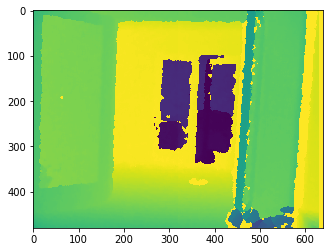

In [4]:
import random
for i in Path("data/study_0001a/").ls():
    if (i.suffix == '.pgm' and random.random() < 0.1):
        k = imageio.imread(i)
        print(k.shape)
        print(i)
        plt.imshow(k)
        plt.show()
        break

In [5]:
!rm -rf files
!mkdir files
!mkdir files/pgm
!mkdir files/ppm

In [6]:
for k in Path('data').iterdir():
    if k.is_dir():
        for f in k.iterdir():
            if f.suffix == '.pgm':
                #print(f, 'files/pgm/' + f.stem + '.pgm')
                #i = imageio.imread(f)
                #imageio.imwrite('files/pgm/' + f.stem + '.png', i)
                copyfile(f, 'files/pgm/' + f.parts[1] + '___' + f.stem + '.pgm')
                
                
            if f.suffix == '.ppm':
                #print(f, 'files/ppm/' + f.stem + '.ppm')
                #i = imageio.imread(f)
                #imageio.imwrite('files/ppm/' + f.stem + '.png', i)
                copyfile(f, 'files/ppm/' + f.parts[1] + '___' + f.stem + '.ppm')

In [2]:
def ppm_to_pgm(p):
    return Path(str(p).replace('.ppm', '.pgm').replace('/ppm/', '/pgm/').replace('___r', '___d'))
def pgm_to_ppm(p):
    return Path(str(p).replace('.pgm', '.ppm').replace('/pgm/', '/ppm/').replace('___d', '___r'))

In [8]:
ppm_files = sorted(list(Path('files/pgm').ls()))

for f in tqdm(Path('files/ppm').ls()):
    
    
    min_dist = 99999999999999
    min_file = '##################\n\n\n'
    
    t0 = float(f.parts[2][f.parts[2].find('-')+1:f.parts[2].rfind('-')])
    for f1 in ppm_files:
        t1 = float(f1.parts[2][f1.parts[2].find('-')+1:f1.parts[2].rfind('-')])
        if (abs(t0-t1) < min_dist):
            min_dist = abs(t0-t1)
            min_file = f1
        #if (abs(t0-t1) > 10000 and min_dist < 0.1): # speedup
        #    break
    
    #print(f)
    #print(min_file)
    #print(min_dist)
        
    os.rename(f, pgm_to_ppm(min_file))

In [3]:
print(len(os.listdir('files/ppm')))
print(len(os.listdir('files/pgm')))

10217
11010


In [4]:
for f in Path('files/ppm').iterdir():
    print(ppm_to_pgm(f).exists())

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [5]:
segments = {i.parts[2][:i.parts[2].find('___')] for i in Path('files/ppm/').iterdir()}
print(segments)
valid_segments = {'office_kitchen_0003', 'study_0005'}
#valid_segments = {'basement_0001a', 'basement_0001b', 'basement_0001c'}  # completely separated

{'study_0007', 'study_0004', 'study_0001b', 'study_0003', 'basement_0001a', 'cafe_0001b', 'study_0001a', 'basement_0001b', 'study_0002', 'study_0006', 'office_kitchen_0003', 'cafe_0001c', 'office_kitchen_0001b', 'basement_0001c', 'office_kitchen_0002', 'study_0008', 'office_kitchen_0001a', 'study_0005', 'cafe_0001a'}


In [6]:
tfms = get_transforms(do_flip=False)

In [7]:
data = (ImageImageList.from_folder('files/ppm')
        .split_by_valid_func((lambda x: x.parts[2][:x.parts[2].find('___')] in valid_segments))
        .label_from_func((lambda x: ppm_to_pgm(x)))
        .transform(tfms, size=(480//4, 640//4), tfm_y=True)
        .databunch(bs=1)
        .normalize(imagenet_stats))

In [8]:
data.sanity_check

<bound method DataBunch.sanity_check of ImageDataBunch;

Train: LabelList (9230 items)
x: ImageImageList
Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160)
y: ImageList
Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160)
Path: files/ppm;

Valid: LabelList (987 items)
x: ImageImageList
Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160)
y: ImageList
Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160)
Path: files/ppm;

Test: None>

In [9]:
learn = unet_learner(data, models.resnet50, metrics=mse)

In [10]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,mean_squared_error,time


RuntimeError: Expected object of scalar type Long but got scalar type Float for argument #2 'target'

In [12]:
data.train_ds

LabelList (9230 items)
x: ImageImageList
Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160)
y: ImageList
Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160)
Path: files/ppm